<a href="https://colab.research.google.com/github/dmitry-petrov-dev/prtheory_mathstat/blob/lesson7/HW_Lesson_7_%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
float(sum(y)) / len(y)

709.9

In [4]:
b = (np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)
b

2.620538882402765

In [5]:
a = np.mean(y)-b*np.mean(X)
a

444.1773573243596

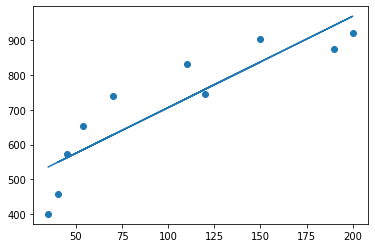

In [6]:
%matplotlib inline
plt.scatter(X,y)
plt.plot(X, a+b*X)
plt.show()

**a) Без intercept** 

In [7]:
X = X.reshape((len(X), 1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
y = y.reshape((len(y), 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [9]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[5.88982042]])

**б) С intercept**

In [10]:
X = np.hstack([np.ones((len(X),1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [11]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

**2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [12]:
alpha = 1e-6
alpha

1e-06

In [13]:
def mse_(B1, y=y, X=X, n=10):
  return np.sum((B1*X-y)**2)/n

In [14]:
B1 = 0.1
n = 10

In [15]:
for i in range(500):
  B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
  if i%10==0:
    print(f'Iteration: {i}, B1={B1}, mse={mse_(B1)}')

Iteration: 0, B1=0.26094768, mse=1027073.9973981536
Iteration: 10, B1=1.6455969021951997, mse=836773.912713573
Iteration: 20, B1=2.6926997710618767, mse=727946.5390674833
Iteration: 30, B1=3.4845424994682612, mse=665711.163427289
Iteration: 40, B1=4.08335177138699, mse=630120.467343122
Iteration: 50, B1=4.536184804099786, mse=609767.1291536206
Iteration: 60, B1=4.8786273231656905, mse=598127.6159933114
Iteration: 70, B1=5.137590054222849, mse=591471.2992089281
Iteration: 80, B1=5.333423492954432, mse=587664.7350920414
Iteration: 90, B1=5.4815171416770845, mse=585487.8659847953
Iteration: 100, B1=5.593508888000083, mse=584242.9745381855
Iteration: 110, B1=5.678199564154357, mse=583531.0554298281
Iteration: 120, B1=5.742244557316458, mse=583123.928512678
Iteration: 130, B1=5.790676820883011, mse=582891.1038494231
Iteration: 140, B1=5.827302387353806, mse=582757.9578412957
Iteration: 150, B1=5.854999464065145, mse=582681.8153088319
Iteration: 160, B1=5.875944616107107, mse=582638.27149304

***3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [16]:
def calculate_coef_intercept(X, y, alpha1 = 0.1, alpha2 = 1e-6, B0_start = 1, B1_start = 0.1):
  B0_ = B0 = B0_start
  B1 = B1_start
  n = len(X)
  for i in range(1000):
    B0_ -=alpha1*(2/n)*np.sum(B0 + B1*X-y) 
    B1 -=alpha2*(2/n)*np.sum((B0 + B1*X-y)*X)
    B0 = B0_
    if i%10==0:
      print(f'Iteration: {i}, B0={B0}, B1={B1}, mse={mse_(B1)}')
  return B0, B1

In [17]:
B0, B1 = calculate_coef_intercept(X, y)

Iteration: 0, B0=282.512, B1=0.26074288, mse=1027106.0517840516
Iteration: 10, B0=679.8676624681913, B1=0.5676161808191176, mse=980372.1939904902
Iteration: 20, B0=677.735445764394, B1=0.6464927003500176, mse=968779.262833242
Iteration: 30, B0=674.2309474787996, B1=0.7122927915897554, mse=959239.4078820748
Iteration: 40, B0=671.2585032355965, B1=0.7679378449330523, mse=951264.9612289909
Iteration: 50, B0=668.7445517205149, B1=0.8149989471789263, mse=944587.2670664774
Iteration: 60, B0=666.6184076692025, B1=0.8548003003500573, mse=938987.3211981405
Iteration: 70, B0=664.820247266285, B1=0.8884618093931984, mse=934285.3054994333
Iteration: 80, B0=663.299475035129, B1=0.916930620144658, mse=930333.0025586551
Iteration: 90, B0=662.013300467335, B1=0.941007769643921, mse=927007.8213733997
Iteration: 100, B0=660.9255340122735, B1=0.961370725198014, mse=924208.0577280233
Iteration: 110, B0=660.0055687988529, B1=0.9785924465197456, mse=921849.1096358576
Iteration: 120, B0=659.2275194391158, B1